In [45]:
def linearSearch(l, goal):
    for i in range(len(l)):
        if l[i]==goal:
            return i
        
def binarySearch(l, goal, ind = 0):
    if len(l) == 0:
        return 'err'
    mid = len(l) - ((len(l) + 2 // 2) // 2)
    if (l[mid] == goal):
        return mid + ind
    elif (l[mid] < goal):
        return binarySearch(l[mid+1:],goal, ind + mid+1)
    elif (l[mid] > goal):
        return binarySearch(l[:mid],goal,ind)
    
def bubbleSort(l):
    for n in range(len(l)-1,0,-1):
        for i in range(n):
            if l[i]>l[i+1]:
                l[i], l[i+1] = l[i+1],l[i]
    return l

def mergeSort(l):
    if len(l) ==1:
        return l
    if len(l) == 2:
        if l[0]<l[1]:
            return l
        else:
            return [l[1],l[0]]
    mid = len(l) - ((len(l) + 2 // 2) // 2)    
    left = mergeSort(l[:mid])
    right = mergeSort(l[mid:])
    out = []
    while left or right:
        if not left:
            out.append(right.pop(0))
        elif not right:
            out.append(left.pop(0))
        elif right[0]>left[0]:
            out.append(left.pop(0))
        else:
            out.append(right.pop(0))
    return out

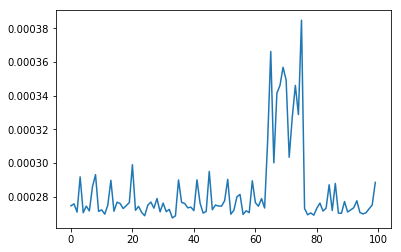

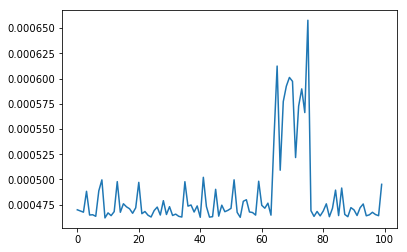

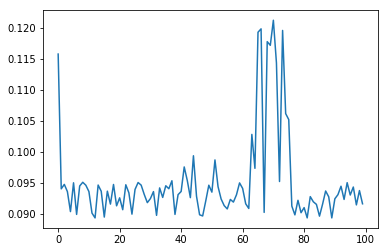

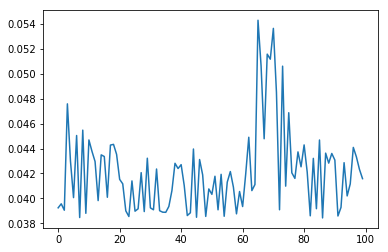

In [171]:
import timeit
from ipywidgets import FloatProgress
from IPython.display import display
import random as rand

def measure(tst):
    li = []
    bi = [] 
    def bubbleSortWrapper():
            bubbleSort(tst)
    def mergeSortWrapper():
            mergeSort(tst)
    bub = timeit.timeit(bubbleSortWrapper,number=100)
    m = timeit.timeit(mergeSortWrapper,number=100)
    for i in range(len(tst)):
        def linearSearchWrapper():
            linearSearch(tst,49)
        def binarySearchWrapper():
            binarySearch(tst,49)
        li.append(timeit.timeit(linearSearchWrapper,number=100))
        bi.append(timeit.timeit(binarySearchWrapper,number=100))
    return li, bi, bub,m
def m(r):
    f = FloatProgress(min=0, max=r, value=1)
    f.bar_style = 'info'
    display(f)
    l,b,bub,m = [],[],[],[]
    for i in range(1,r+1):
        f.value += 1
        ttt = [rand.randint(0,i) for i in range(i*100)]
        linear, binary, bubble, merge = measure(tst)
        bub.append(bubble)
        m.append(merge)
        l.append(sum(linear)/len(linear))
        b.append(sum(binary)/len(binary))
    return l,b,bub,m

import matplotlib.pyplot as plt
linear, binary, bubble, merge = m(100)
plt.plot(linear)
plt.show()
plt.plot(binary)
plt.show()
plt.plot(bubble)
plt.show()
plt.plot(merge)
plt.show()